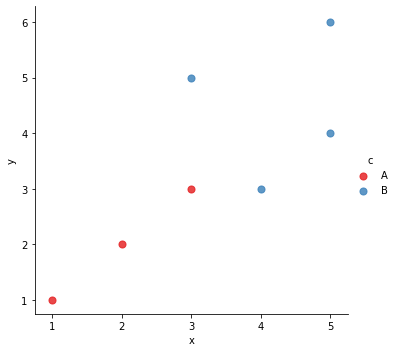

In [1]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import operator
data = pd.read_csv("/storage/emulated/0/knn.csv")
sns.lmplot('x','y',hue='c',data=data,
           palette = 'Set1', 
           fit_reg = False, 
           scatter_kws = {"s" :50})
plt.show() 
 

In [2]:
#finding the Euclidean distance 
def euclidean_distance(pt1, pt2, dimension):
    distance = 0
    for x in range(dimension):
        distance += np.square(pt1[x] - pt2[x]) 
    return np.sqrt(distance) 


In [5]:
#implementing knn
def knn(training_points, test_point, k):
    distances = {} 
    #number of axes
    dimension = test_point.shape[1]
    #calculating Euclidean distance between 
    #each point in train and test data 
    for x in range(len(training_points)):
        dist = euclidean_distance(test_point, training_points.iloc[x],dimension) 
        distances[x] = dist[0]
    #sorting the distances
    sorted_d = sorted(distances.items(), key=operator.itemgetter(1))
    #storing the neighbours 
    neighbours = [] 
    #extracting top k neighbours
    for x in range(k):
        neighbours.append(sorted_d[x][0])
    #finding class for each neighbours found 
    class_counter = {} 
    for x in range(len(neighbours)):
        #class for that particular point 
        cls = training_points.iloc[neighbours[x]][-1]
        if cls in class_counter:
            class_counter[cls] += 1
        else:
            class_counter[cls] = 1
    #sort class counter in descending order 
    sorted_counter = sorted(class_counter.items(), 
                            key=operator.itemgetter(1),
                            reverse = True) 
    #return class with most count and neighbors found
    return(sorted_counter[0][0], neighbours) 
    
    


In [8]:
#making a prediction 
test_set = [[3,3.9]]
test = pd.DataFrame(test_set) 
cls,neighbours = knn(data, test, 5)
print('Predicted Class:' + cls)

Predicted Class:B


_______________
k= 7
Class B
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
6  5  4  B
1  2  2  A
5  5  6  B
0  1  1  A
_______________
k= 5
Class B
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
6  5  4  B
1  2  2  A
_______________
k= 3
Class B
   x  y  c
3  3  3  A
4  3  5  B
2  4  3  B
_______________
k= 1
Class A
   x  y  c
3  3  3  A


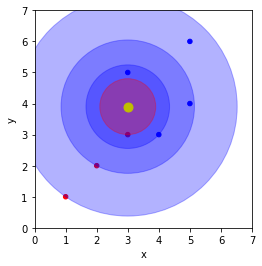

In [9]:
#visualizing different values of k
#generating a color map
colors = ['r' if i=='A' else 'b' for i in data['c']] 
ax = data.plot(kind='scatter',x='x',y='y',c=colors)
plt.xlim(0,7)
plt.ylim(0,7)
#plotting test set
plt.plot(test_set[0][0],test_set[0][1], 'yo', markersize='9') 
for k in range(7,0,-2):
    cls,neighbours = knn(data, test, k) 
    print("_______________") 
    print("k=", k) 
    print("Class", cls) 
    print(data.iloc[neighbours])
    
    furthest_point = data.iloc[neighbours].tail(1)
    radius = euclidean_distance(test, furthest_point.iloc[0], 2)
    #display circle in red if classification is A, else blue
    c = 'r' if cls=='A' else 'b' 
    circle = plt.Circle((test_set[0][0],test_set[0][1]),
                        radius, color=c, alpha=0.3)
    ax.add_patch(circle)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

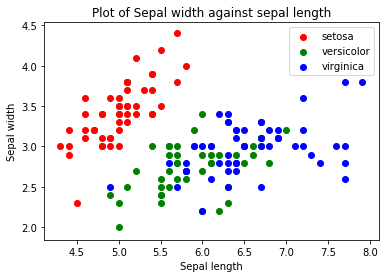

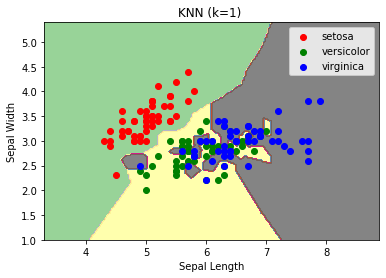

In [10]:
#implementing the algorithm using scikit-learn'built in function
%matplotlib inline 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from sklearn import datasets
iris = datasets.load_iris() 
X = iris.data[:, :2] #using first two features 
y = iris.target 
#plotting the points 
colors = ['red','green','blue'] 
for color, i, target in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color = color, label=target) 
plt.xlabel('Sepal length') 
plt.ylabel('Sepal width') 
plt.legend(loc='best') 
plt.title('Plot of Sepal width against sepal length') 
plt.show()
from sklearn.neighbors import KNeighborsClassifier
k=1
knn = KNeighborsClassifier(n_neighbors = k) 
knn.fit(X, y) 
#min and max for first feature
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
#for the second feature
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
#h is the step size for the mesh
h = (x_max/x_min) / 100
#making predictions for points in xx and yy
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                     np.arange(y_min, y_max, h)) 
z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
#drawing a color plot
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, cmap = plt.cm.Accent, alpha = 0.8)
#plotting the training points
colors = ['red','green','blue'] 
for color, i, target in zip(colors, [0,1,2], iris.target_names):
    plt.scatter(X[y==i, 0], X[y==i, 1], color=color, label=target) 
plt.xlabel('Sepal Length') 
plt.ylabel('Sepal Width') 
plt.title(f'KNN (k={k}) ') 
plt.legend(loc = 'best') 

In [11]:
#parameter tuning

1 0.96
2 0.9533333333333334
4 0.9666666666666666
5 0.9666666666666668
7 0.9666666666666668
8 0.9666666666666668
10 0.9666666666666668
11 0.9666666666666668
13 0.9800000000000001
14 0.9733333333333334
16 0.9733333333333334
17 0.9733333333333334
19 0.9733333333333334
20 0.9800000000000001
22 0.9666666666666666
23 0.9733333333333334
25 0.9666666666666666
26 0.96
28 0.9533333333333334
29 0.9533333333333334
31 0.9466666666666667
32 0.9466666666666667
34 0.9466666666666667
35 0.9466666666666667
37 0.9466666666666667
38 0.9466666666666667
40 0.9533333333333334
41 0.9533333333333334
43 0.9466666666666667
44 0.9400000000000001
46 0.9333333333333333
47 0.9333333333333333
49 0.9400000000000001
50 0.9266666666666667
52 0.9333333333333333
53 0.9333333333333333
55 0.9333333333333333
56 0.9066666666666666
58 0.9133333333333334
59 0.9200000000000002
61 0.9199999999999999
62 0.9066666666666666
64 0.9
65 0.9
67 0.8866666666666667
68 0.8800000000000001
70 0.8866666666666667
71 0.8866666666666667
73 0.893

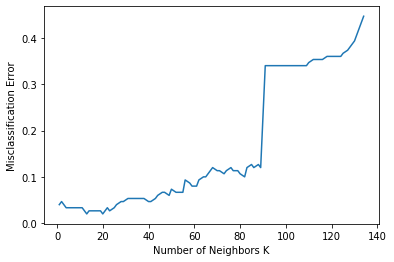

In [12]:
from sklearn.model_selection import cross_val_score
cv_scores = [] #holds the cv scores
X = iris.data[:, :4] #using a features
y = iris.target 
folds = 10
#creating an odd list of K for KNN
ks = list(range(1, int(len(X) * ((folds - 1)/folds))))
ks = [k for k in ks if k%3 != 0]
#performing cross validation 
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k) 
    scores = cross_val_score(knn, X, y, cv=folds, scoring='accuracy') 
    mean = scores.mean()
    cv_scores.append(mean)
    print(k, mean) 
#optimal k
mse = [1 - x for x in cv_scores] 
optimal_k = ks[mse.index(min(mse))]
print(f"The optimal number of neighbors is {optimal_k}") 
#plot of misclassification error
plt.plot(ks, mse) 
plt.xlabel('Number of Neighbors K') 
plt.ylabel('Misclassification Error') 
plt.show()